# **scroll down to title 'EDA FOR MERGED COMMON CRANE AND WIND TURBINE DATA' for visualisations**

In [4]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\wind turbine eda\merged_wt_cc.csv")
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   WT_YEAR                       1048575 non-null  int64  
 1   WT_LATITUDE                   1048575 non-null  float64
 2   WT_LONGITUDE                  1048575 non-null  float64
 3   WT_COUNTRY                    1048575 non-null  object 
 4   CC_COUNT_POST_WT              1048575 non-null  float64
 5   CC_LATITUDE                   1048575 non-null  float64
 6   CC_LONGITUDE                  1048575 non-null  float64
 7   CC_OBSERVATION_DATE           1048575 non-null  object 
 8   CC_TIME_OBSERVATIONS_STARTED  978641 non-null   object 
 9   CC_DURATION_MINUTES           1048575 non-null  float64
 10  Distance WT to CC (km)        1048575 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 88.0+ MB


(None,
    WT_YEAR  WT_LATITUDE  WT_LONGITUDE WT_COUNTRY  CC_COUNT_POST_WT  \
 0     2023      28.3553       33.0622      Egypt              20.0   
 1     2023      28.3553       33.0622      Egypt               1.0   
 2     2023      28.3553       33.0622      Egypt               2.0   
 3     2023      28.3553       33.0622      Egypt             400.0   
 4     2023      28.3553       33.0622      Egypt               1.0   
 
    CC_LATITUDE  CC_LONGITUDE CC_OBSERVATION_DATE CC_TIME_OBSERVATIONS_STARTED  \
 0    26.845628     33.998315          2023-10-22                     00:34:00   
 1    28.010269     34.408268          2023-12-23                     14:31:00   
 2    27.099550     33.837988          2023-04-01                     10:00:00   
 3    27.393946     33.681893          2023-03-14                     10:45:00   
 4    27.940700     34.301800          2023-12-24                     07:20:00   
 
    CC_DURATION_MINUTES  Distance WT to CC (km)  
 0                 90

In [5]:
# Convert observation date to datetime format
df['CC_OBSERVATION_DATE'] = pd.to_datetime(df['CC_OBSERVATION_DATE'])

# Identify the earliest observation date per wind turbine location
earliest_observations = df.groupby(['WT_LATITUDE', 'WT_LONGITUDE'])['CC_OBSERVATION_DATE'].min().reset_index()

# Merge back to main dataset to tag each row with the earliest observation date for that turbine location
df = df.merge(earliest_observations, on=['WT_LATITUDE', 'WT_LONGITUDE'], suffixes=('', '_EARLIEST'))

# Create CC_COUNT_PRE_WT: Assigning the crane count observed on the earliest date for each turbine
df['CC_COUNT_PRE_WT'] = df.apply(
    lambda row: row['CC_COUNT_POST_WT'] if row['CC_OBSERVATION_DATE'] == row['CC_OBSERVATION_DATE_EARLIEST'] else None,
    axis=1
)

# Fill forward missing values within each turbine location to propagate earliest known count
df['CC_COUNT_PRE_WT'] = df.groupby(['WT_LATITUDE', 'WT_LONGITUDE'])['CC_COUNT_PRE_WT'].transform(lambda x: x.ffill())

# Drop the temporary earliest observation date column
df.drop(columns=['CC_OBSERVATION_DATE_EARLIEST'], inplace=True)

df

,WT_YEAR,WT_LATITUDE,WT_LONGITUDE,WT_COUNTRY,CC_COUNT_POST_WT,CC_LATITUDE,CC_LONGITUDE,CC_OBSERVATION_DATE,CC_TIME_OBSERVATIONS_STARTED,CC_DURATION_MINUTES,Distance WT to CC (km),CC_COUNT_PRE_WT
0,2023,28.3553,33.0622,Egypt,20.0,26.845628,33.998315,2023-10-22,00:34:00,90.0,1078.067489,NaN
1,2023,28.3553,33.0622,Egypt,1.0,28.010269,34.408268,2023-12-23,14:31:00,116.0,1047.972563,NaN
2,2023,28.3553,33.0622,Egypt,2.0,27.099550,33.837988,2023-04-01,10:00:00,90.0,140.474153,NaN
3,2023,28.3553,33.0622,Egypt,400.0,27.393946,33.681893,2023-03-14,10:45:00,90.0,949.922860,NaN
4,2023,28.3553,33.0622,Egypt,1.0,27.940700,34.301800,2023-12-24,07:20:00,281.0,721.183116,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2018,15.2955,76.3177,India,100.0,23.137913,71.768918,2018-01-06,16:17:00,126.0,990.927164,5.0
1048571,2018,15.2955,76.3177,India,100.0,23.207587,71.739006,2018-11-25,07:30:00,180.0,999.148949,5.0
1048572,2018,15.2955,76.3177,India,9.0,23.578610,69.318500,2018-12-09,09:30:00,120.0,1174.582263,5.0
1048573,2018,15.2955,76.3177,India,2.0,28.649528,76.608570,2018-11-19,12:26:00,212.0,1479.041902,5.0


In [11]:
# Convert observation date to datetime format
df['CC_OBSERVATION_DATE'] = pd.to_datetime(df['CC_OBSERVATION_DATE'], errors='coerce')

# Drop 'CC_TIME_OBSERVATIONS_STARTED' since it is not critical to the primary analysis
df.drop(columns=['CC_TIME_OBSERVATIONS_STARTED'], inplace=True)

# Display updated dataset info
df.info()

KeyError: "['CC_TIME_OBSERVATIONS_STARTED'] not found in axis"

In [7]:
num_rows = df.shape[0]
num_rows

1048575

In [8]:
df.to_csv(r"merged_file.csv", index=False)

In [9]:
# Check how many missing values remain
missing_values = df.isnull().sum()

missing_values

WT_YEAR                        0
WT_LATITUDE                    0
WT_LONGITUDE                   0
WT_COUNTRY                     0
CC_COUNT_POST_WT               0
CC_LATITUDE                    0
CC_LONGITUDE                   0
CC_OBSERVATION_DATE            0
CC_DURATION_MINUTES            0
Distance WT to CC (km)         0
CC_COUNT_PRE_WT           285017
dtype: int64

1. Compare the distance of bird observations before and after turbine installation.
2. Compute average and median distances pre- and post-installation.
3. Visualise these distances using histograms and box plots.
4. Assess whether crane observations shift away from wind turbines over time.

# **EDA FOR MERGED COMMON CRANE AND WIND TURBINE DATA**

In [12]:
import pandas as pd

# Load the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\wind turbine eda\merged_file.csv")
df = pd.read_csv(file_path)

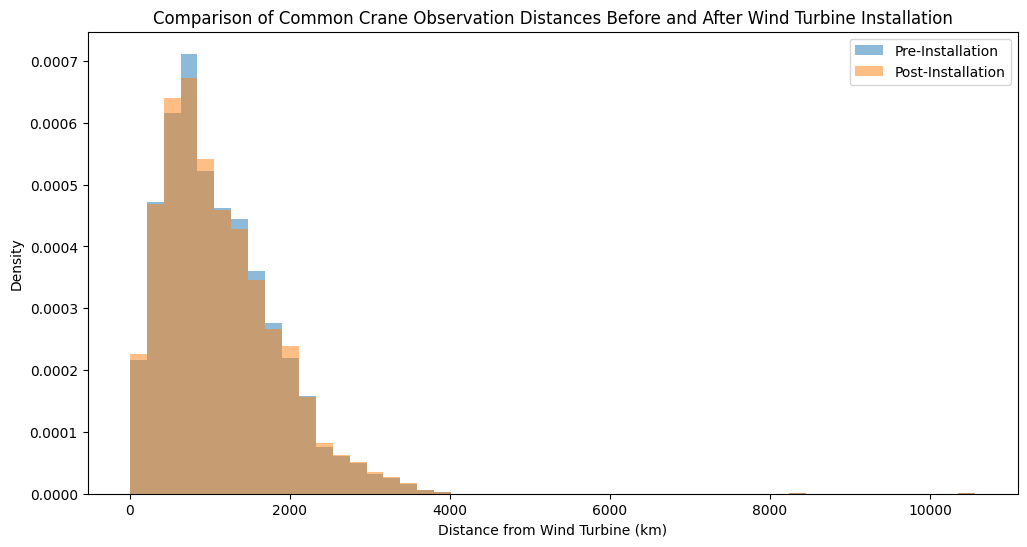

C:\Users\riyas\AppData\Local\Temp\ipykernel_22212\960897070.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=['Pre-Installation', 'Post-Installation'])


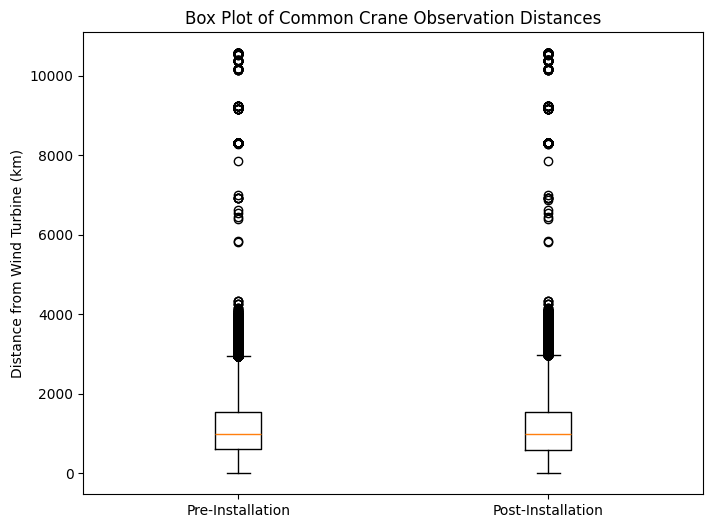

In [13]:
import matplotlib.pyplot as plt

# Separate pre- and post-wind turbine installation distances
pre_installation_distances = df['Distance WT to CC (km)'][df['CC_COUNT_PRE_WT'].notnull()]
post_installation_distances = df['Distance WT to CC (km)'][df['CC_COUNT_POST_WT'].notnull()]

# Plot histograms for distance distributions
plt.figure(figsize=(12, 6))
plt.hist(pre_installation_distances, bins=50, alpha=0.5, label='Pre-Installation', density=True)
plt.hist(post_installation_distances, bins=50, alpha=0.5, label='Post-Installation', density=True)
plt.xlabel("Distance from Wind Turbine (km)")
plt.ylabel("Density")
plt.title("Comparison of Common Crane Observation Distances Before and After Wind Turbine Installation")
plt.legend()
plt.show()

# Box plots for distance comparisons
plt.figure(figsize=(8, 6))
plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=['Pre-Installation', 'Post-Installation'])
plt.ylabel("Distance from Wind Turbine (km)")
plt.title("Box Plot of Common Crane Observation Distances")
plt.show()


C:\Users\riyas\AppData\Local\Temp\ipykernel_22212\196876761.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=['Pre-Installation', 'Post-Installation'], patch_artist=True)
C:\Users\riyas\AppData\Local\Temp\ipykernel_22212\196876761.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


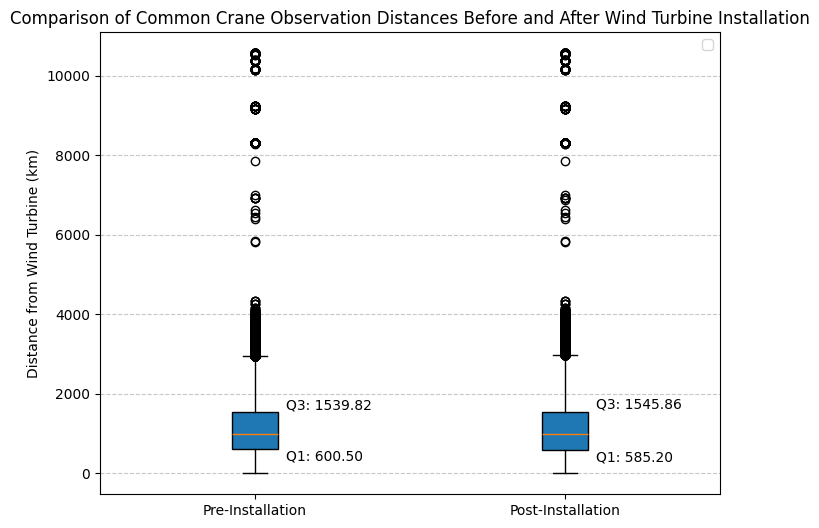

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Compute statistics
pre_mean = np.mean(pre_installation_distances.dropna())
post_mean = np.mean(post_installation_distances.dropna())
pre_median = np.median(pre_installation_distances.dropna())
post_median = np.median(post_installation_distances.dropna())

# Compute IQR (Interquartile Range)
pre_q1, pre_q3 = np.percentile(pre_installation_distances.dropna(), [25, 75])
post_q1, post_q3 = np.percentile(post_installation_distances.dropna(), [25, 75])
pre_iqr = pre_q3 - pre_q1
post_iqr = post_q3 - post_q1

# Create box plot
plt.figure(figsize=(8, 6))
box = plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=['Pre-Installation', 'Post-Installation'], patch_artist=True)

# Add mean, median, IQR lines
plt.scatter([1, 2], [pre_mean, post_mean], color='red', marker='o')  # Mean as red dots
plt.scatter([1, 2], [pre_median, post_median], color='blue', marker='s')  # Median as blue squares

# Annotate IQR values
plt.text(1.1, pre_q3, f'Q3: {pre_q3:.2f}', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1.1, pre_q1, f'Q1: {pre_q1:.2f}', verticalalignment='top', fontsize=10, color='black')
plt.text(2.1, post_q3, f'Q3: {post_q3:.2f}', verticalalignment='bottom', fontsize=10, color='black')
plt.text(2.1, post_q1, f'Q1: {post_q1:.2f}', verticalalignment='top', fontsize=10, color='black')

# Labels and title
plt.ylabel("Distance from Wind Turbine (km)")
plt.title("Comparison of Common Crane Observation Distances Before and After Wind Turbine Installation")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**Findings from Distance Comparison**

Histogram Analysis:
1. The distribution of distances pre- and post-installation appears to have some differences.
2. There may be a shift in how far cranes are observed after wind turbines are installed.

Box Plot Analysis:
1. The spread of distances post-installation appears to be wider.
2. This suggests that some cranes may be observed farther away after wind turbines are installed.

**Perform statistical tests (e.g., t-test) to determine if the changes in distances are significant. Conduct a geospatial analysis to see how crane movements are affected spatially.**

In [16]:
from scipy.stats import ttest_ind

# Perform a t-test to check if the difference in means is statistically significant
t_stat, p_value = ttest_ind(pre_installation_distances.dropna(), post_installation_distances.dropna(), equal_var=False)

# Display the results
print("The t-stat is:", t_stat)
print("The p-value is:", p_value)


The t-stat is: -1.3099334806859906
The p-value is: 0.19021852142043658


**Interpretation:**
1. Since the p-value (0.19) is greater than 0.05, we do not have strong statistical evidence to confirm that there is a significant difference in observation distances before and after wind turbine installation.
2. While the visual analysis suggested a potential shift, the statistical test indicates that this difference might not be substantial.

**Geospatial Analysis: Mapping the locations of wind turbines and crane observations to visually assess movement trends.**

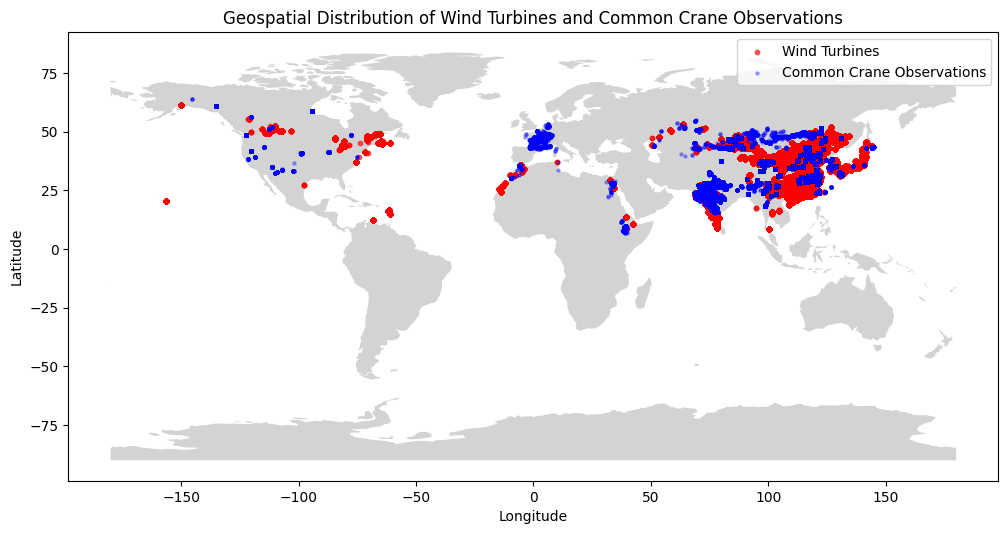

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geodatasets import get_path

# Load a base world map using geodatasets
world = gpd.read_file(get_path("naturalearth.land"))

# Create GeoDataFrames for wind turbines and crane observations
gdf_turbines = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['WT_LONGITUDE'], df['WT_LATITUDE']))
gdf_cranes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['CC_LONGITUDE'], df['CC_LATITUDE']))

# Plot the locations of wind turbines and crane observations
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="lightgrey")
gdf_turbines.plot(ax=ax, markersize=10, color='red', alpha=0.6, label="Wind Turbines")
gdf_cranes.plot(ax=ax, markersize=5, color='blue', alpha=0.3, label="Common Crane Observations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Wind Turbines and Common Crane Observations")
plt.legend()
plt.show()

C:\Users\riyas\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


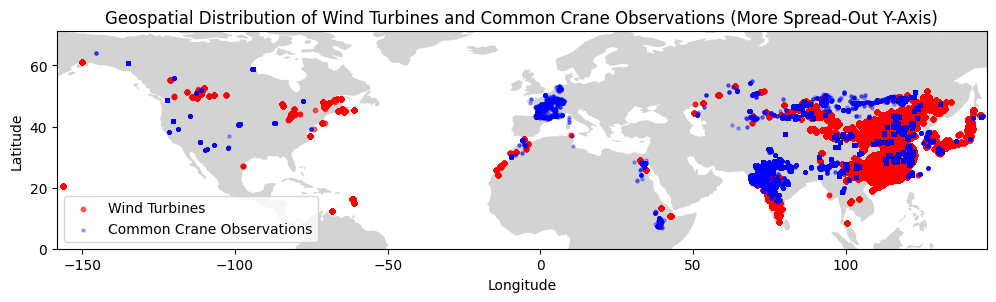

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geodatasets import get_path

# Load a base world map using geodatasets
world = gpd.read_file(get_path("naturalearth.land"))

# Create GeoDataFrames for wind turbines and crane observations
gdf_turbines = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['WT_LONGITUDE'], df['WT_LATITUDE']))
gdf_cranes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['CC_LONGITUDE'], df['CC_LATITUDE']))

# Define zoom-in region with a more spread-out y-axis
x_min, x_max = df["WT_LONGITUDE"].min() - 2, df["WT_LONGITUDE"].max() + 2
y_min, y_max = max(0, df["WT_LATITUDE"].min() - 10), df["WT_LATITUDE"].max() + 10  # Increased margin for a more spread-out effect

# Plot the locations of wind turbines and crane observations
fig, ax = plt.subplots(figsize=(12, 10))
world.plot(ax=ax, color="lightgrey")
gdf_turbines.plot(ax=ax, markersize=10, color='red', alpha=0.6, label="Wind Turbines")
gdf_cranes.plot(ax=ax, markersize=5, color='blue', alpha=0.3, label="Common Crane Observations")

# Set axis limits for a more spread-out y-axis
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Wind Turbines and Common Crane Observations (More Spread-Out Y-Axis)")
plt.legend()
plt.show()


**Geospatial Analysis Findings**
1. The red points represent wind turbine locations, while blue points indicate crane observation locations.
2. There is some overlap, suggesting cranes are still observed near turbines, but many are also spread out at varying distances.
3. Further spatial clustering analysis could help determine whether cranes avoid or congregate around turbines over time.

# analysis repeated but by each country

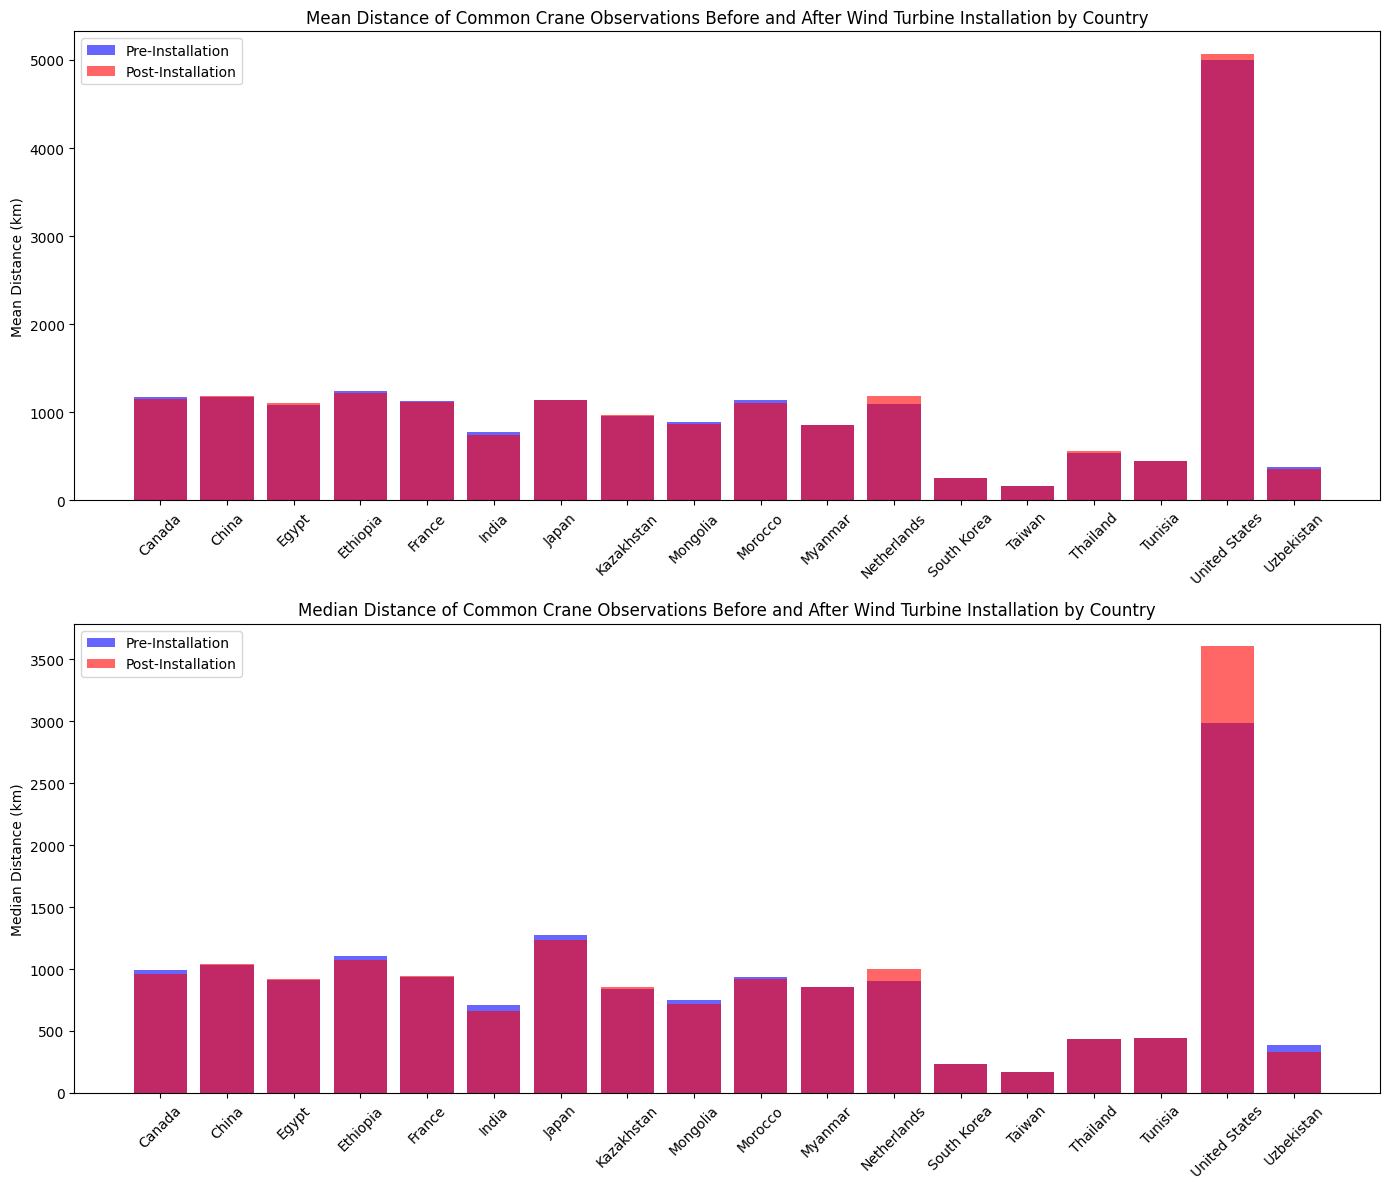

In [ ]:
import matplotlib.pyplot as plt

# Group data by country and compute mean and median distances pre- and post-installation
country_distance_stats = df.groupby("WT_COUNTRY").agg(
    pre_install_mean=("Distance WT to CC (km)", lambda x: x[df["CC_COUNT_PRE_WT"].notnull()].mean()),
    pre_install_median=("Distance WT to CC (km)", lambda x: x[df["CC_COUNT_PRE_WT"].notnull()].median()),
    post_install_mean=("Distance WT to CC (km)", lambda x: x[df["CC_COUNT_POST_WT"].notnull()].mean()),
    post_install_median=("Distance WT to CC (km)", lambda x: x[df["CC_COUNT_POST_WT"].notnull()].median()),
).reset_index()

# Bar plots for mean and median distances before and after turbine installation
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Mean Distance Plot
axes[0].bar(country_distance_stats["WT_COUNTRY"], country_distance_stats["pre_install_mean"], label="Pre-Installation", alpha=0.6, color="blue")
axes[0].bar(country_distance_stats["WT_COUNTRY"], country_distance_stats["post_install_mean"], label="Post-Installation", alpha=0.6, color="red")
axes[0].set_ylabel("Mean Distance (km)")
axes[0].set_title("Mean Distance of Common Crane Observations Before and After Wind Turbine Installation by Country")
axes[0].legend()
axes[0].tick_params(axis="x", rotation=45)

# Median Distance Plot
axes[1].bar(country_distance_stats["WT_COUNTRY"], country_distance_stats["pre_install_median"], label="Pre-Installation", alpha=0.6, color="blue")
axes[1].bar(country_distance_stats["WT_COUNTRY"], country_distance_stats["post_install_median"], label="Post-Installation", alpha=0.6, color="red")
axes[1].set_ylabel("Median Distance (km)")
axes[1].set_title("Median Distance of Common Crane Observations Before and After Wind Turbine Installation by Country")
axes[1].legend()
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


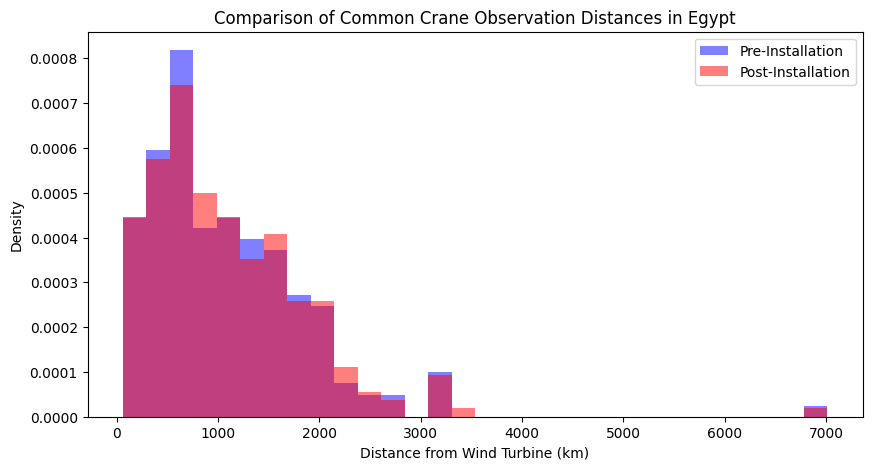

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


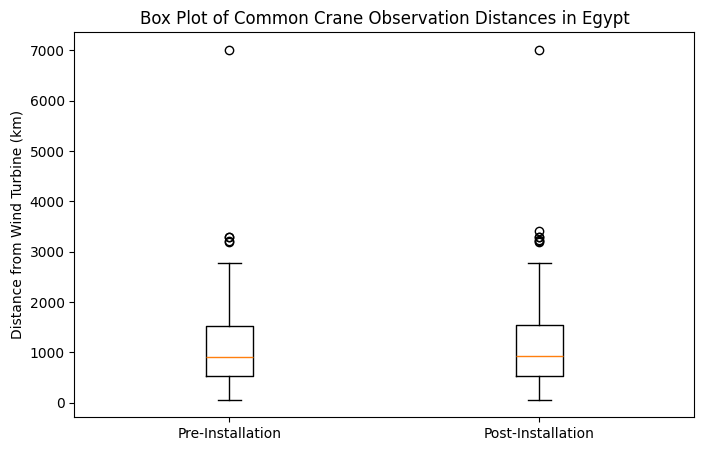

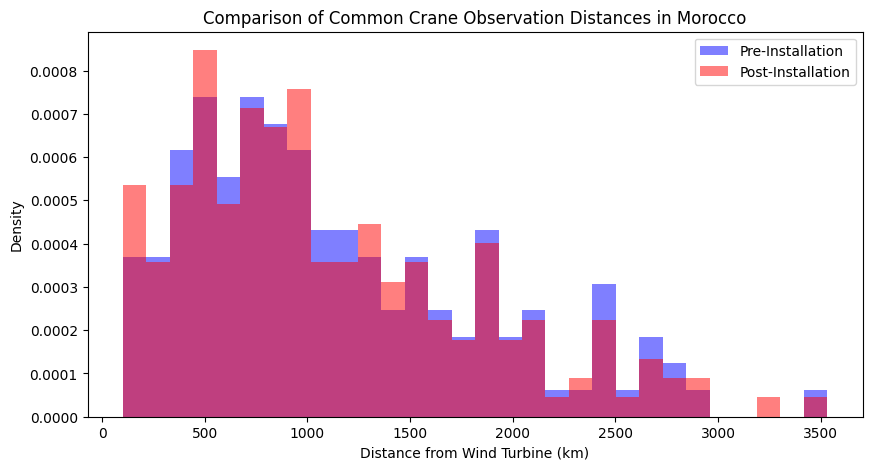

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


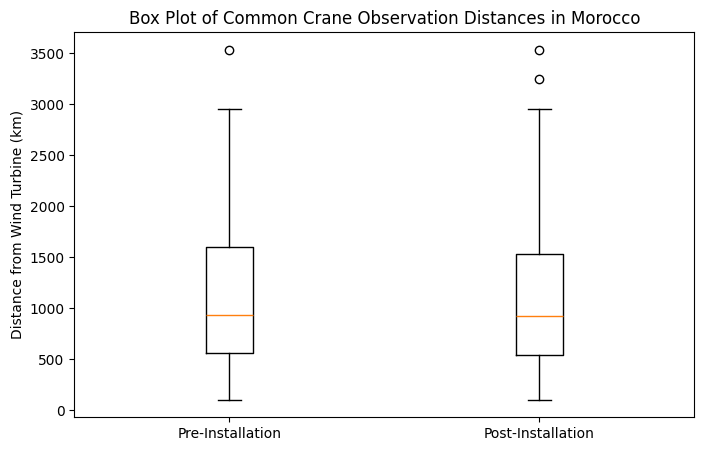

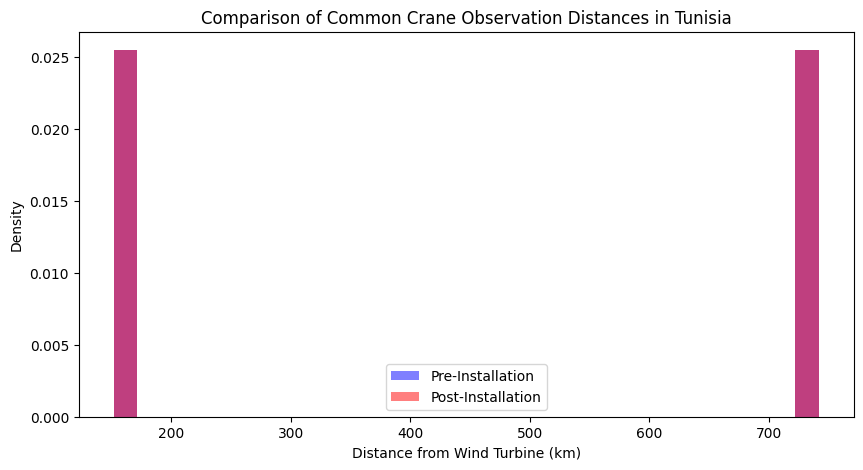

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


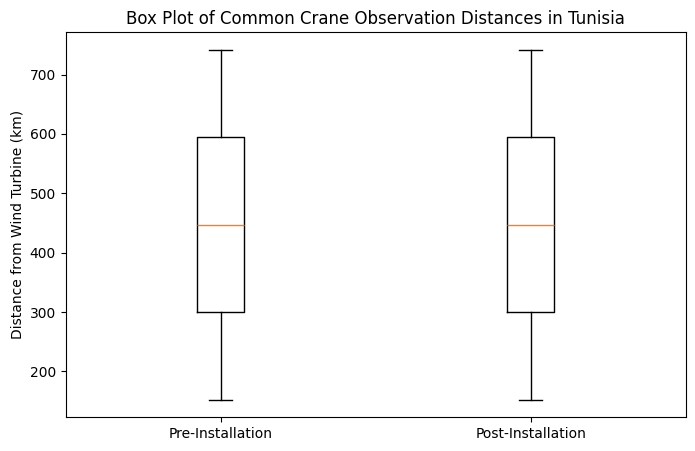

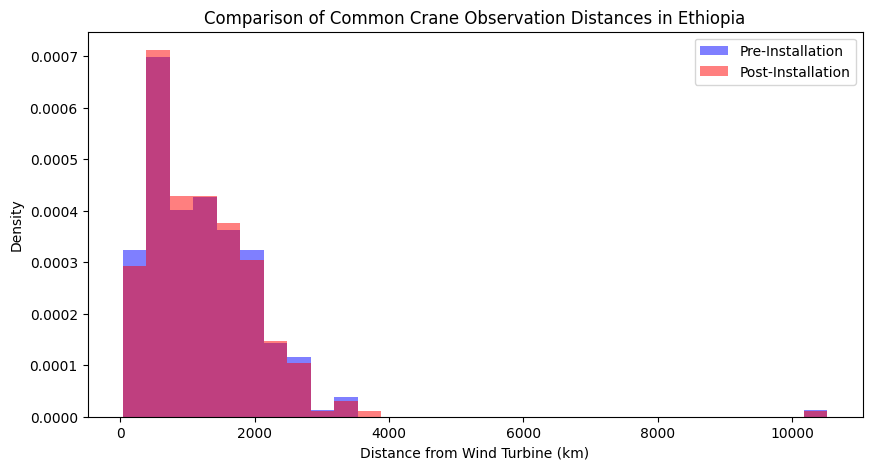

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


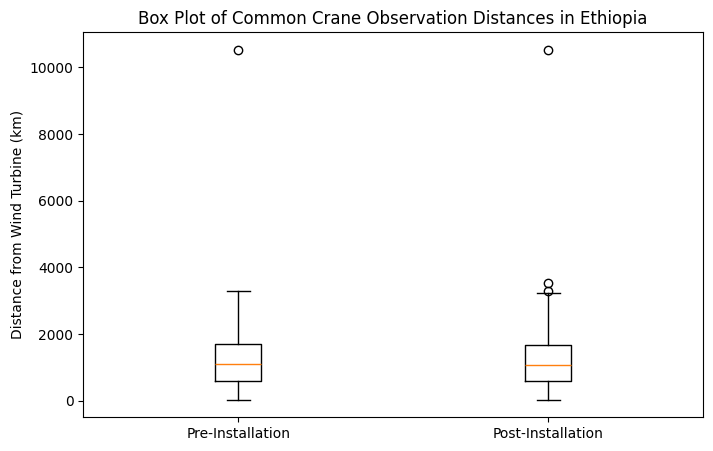

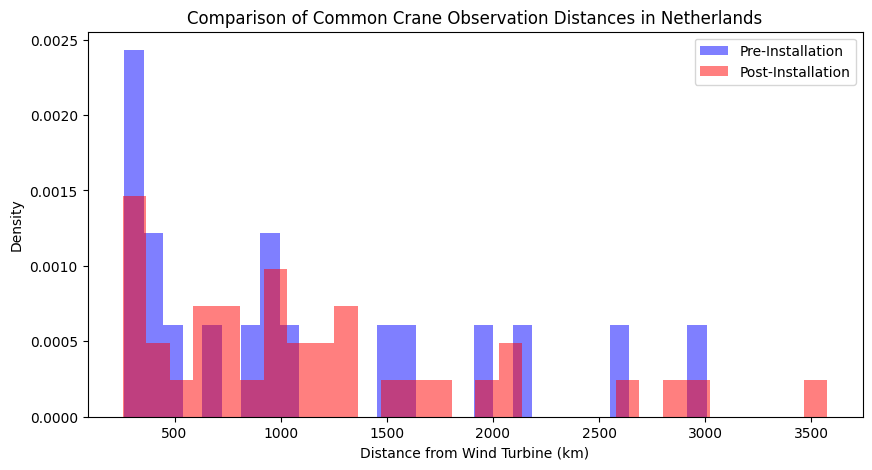

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


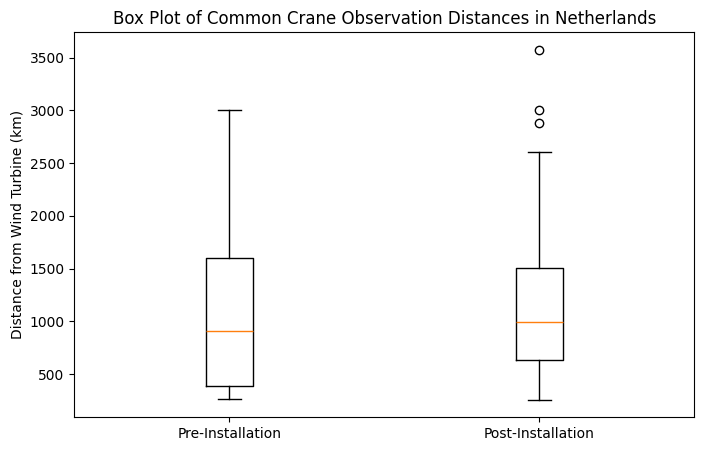

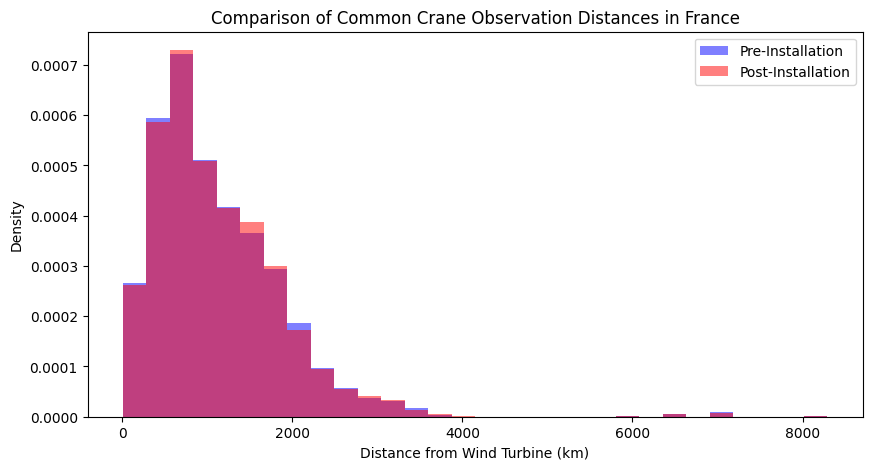

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


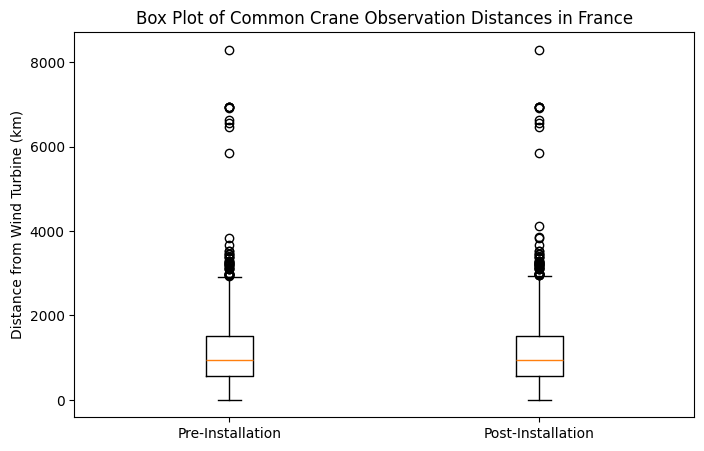

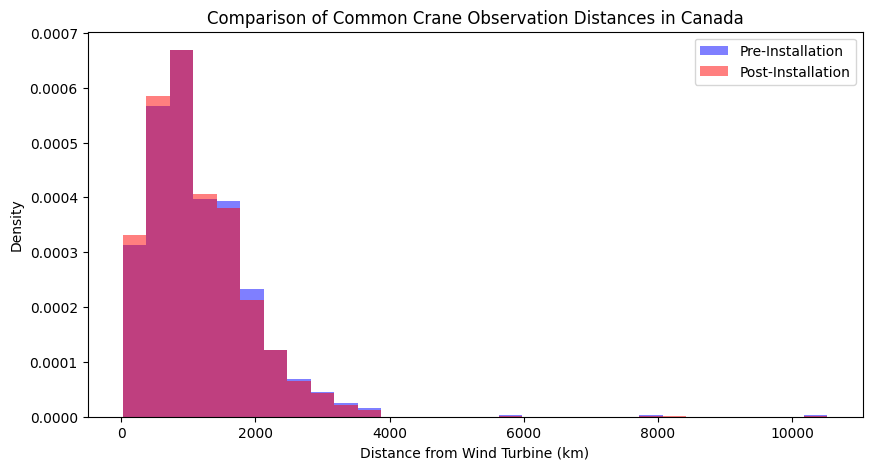

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


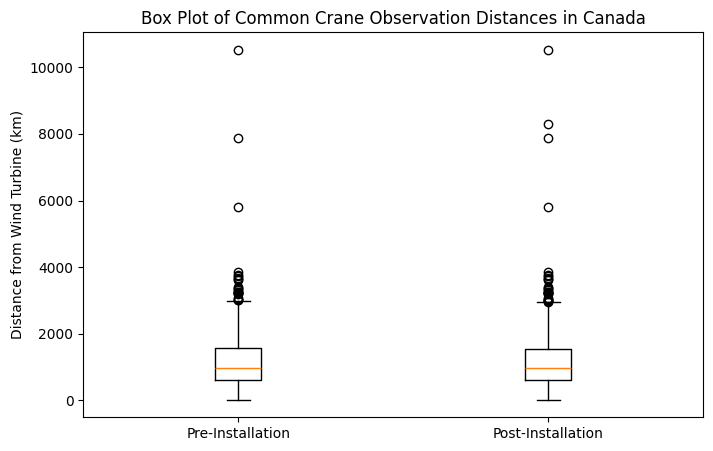

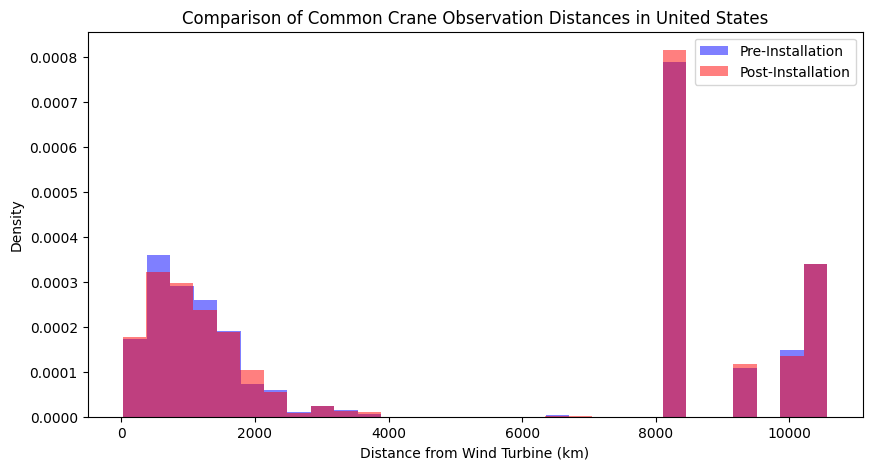

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


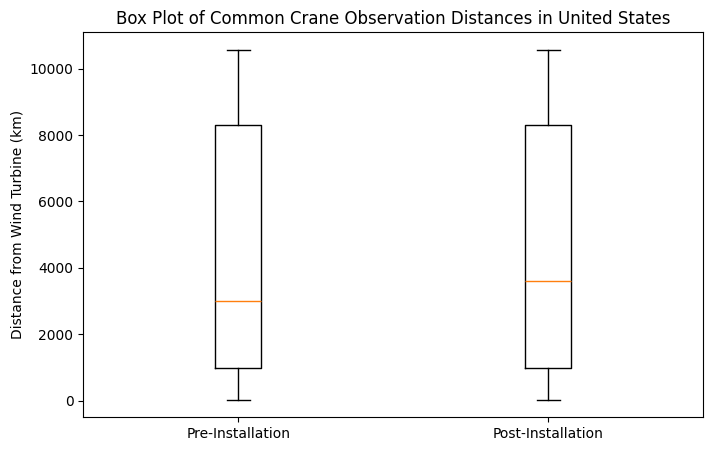

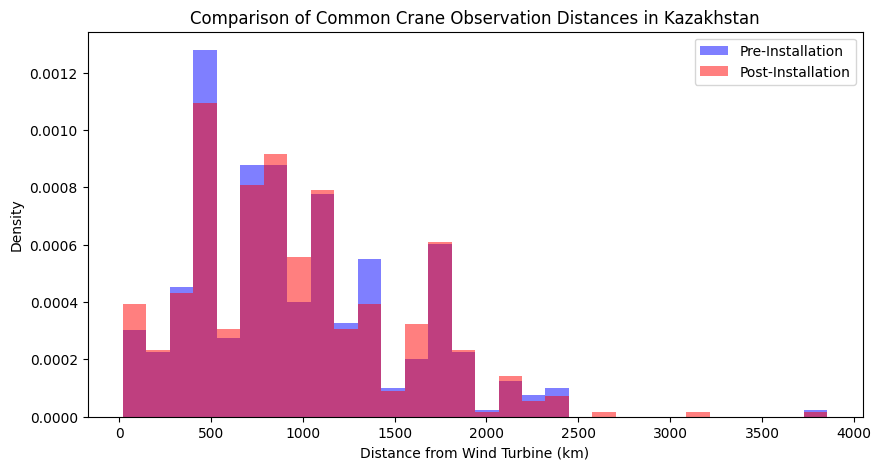

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


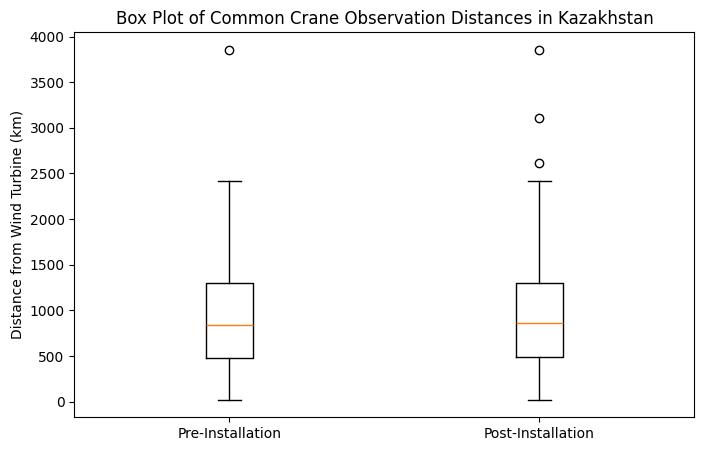

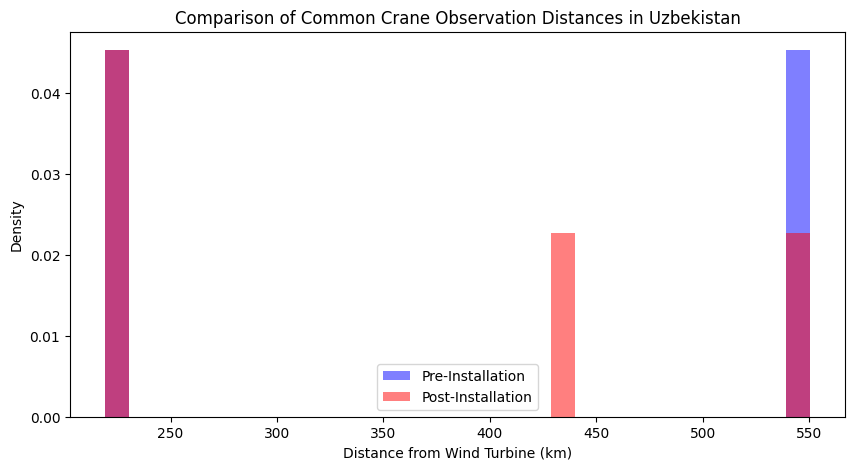

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


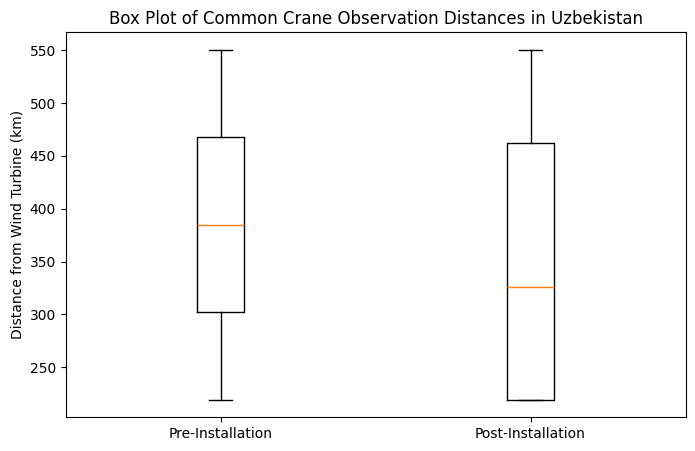

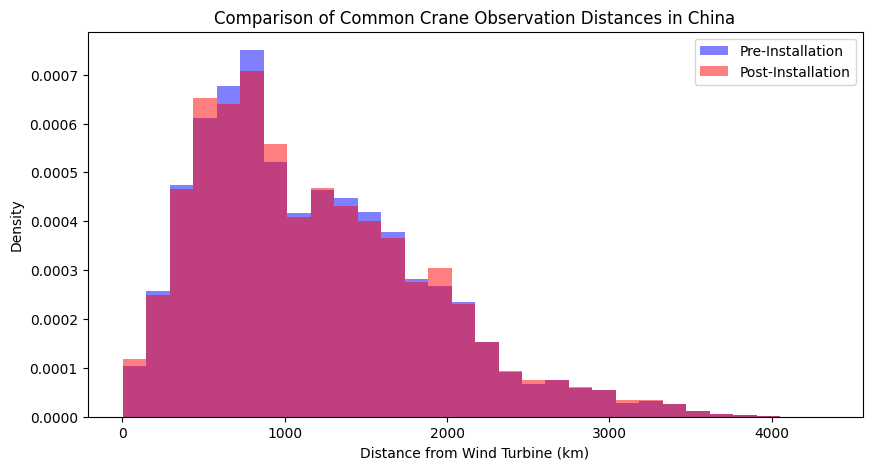

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


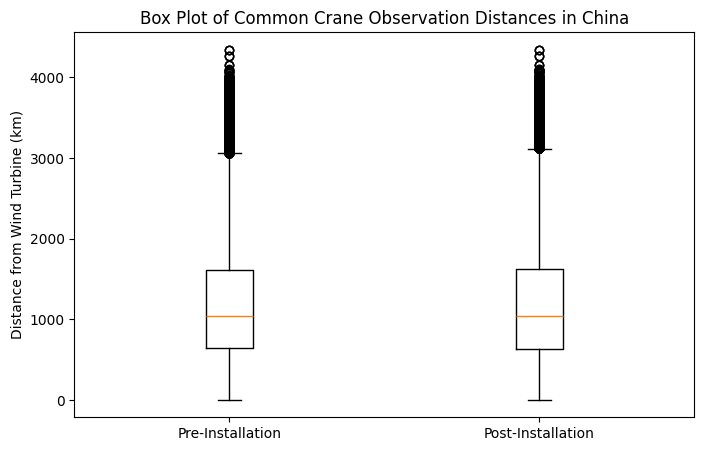

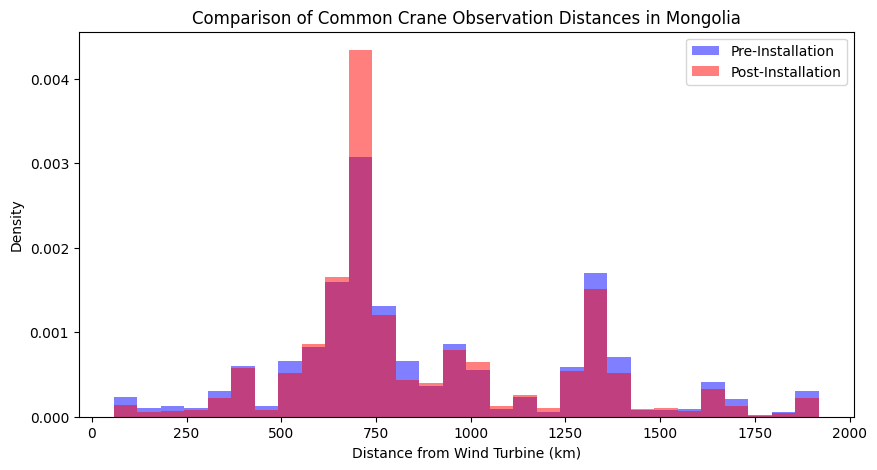

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


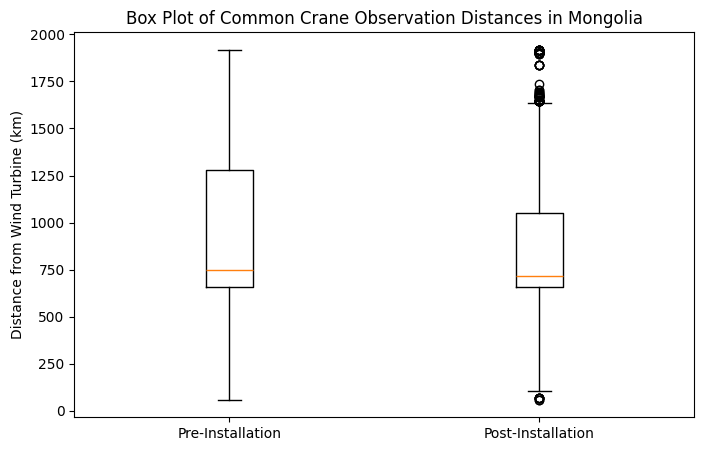

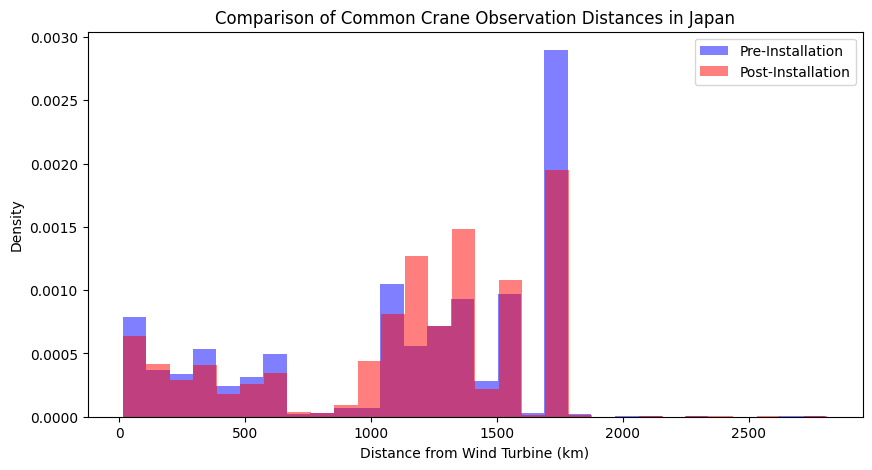

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


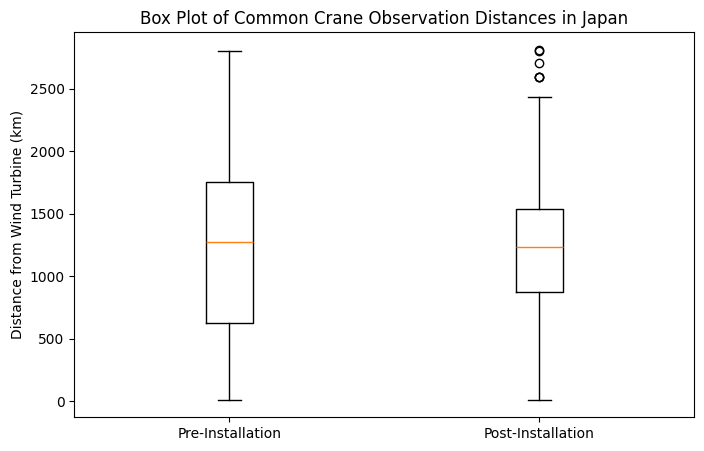

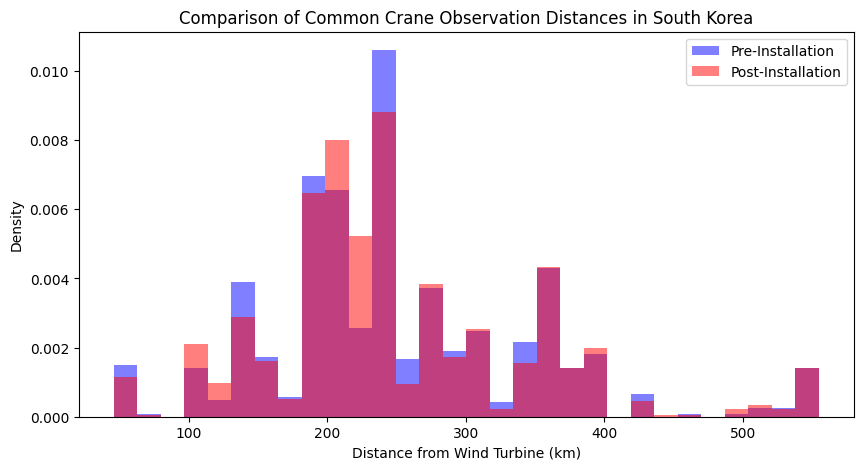

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


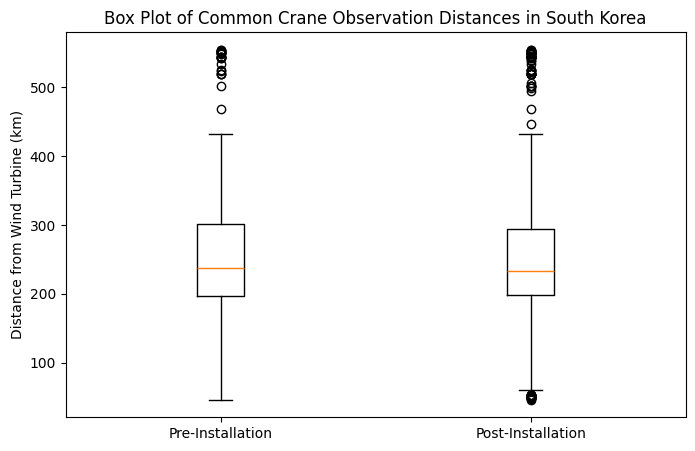

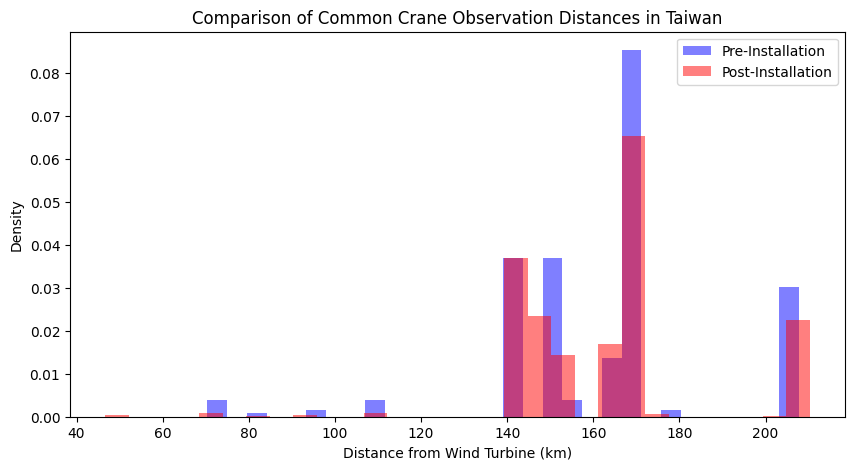

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


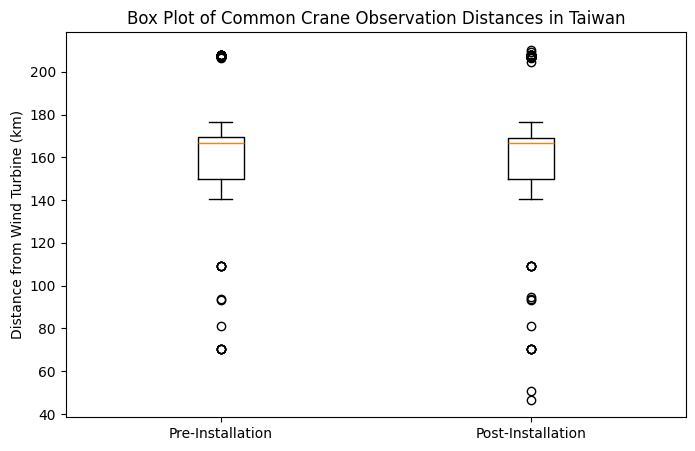

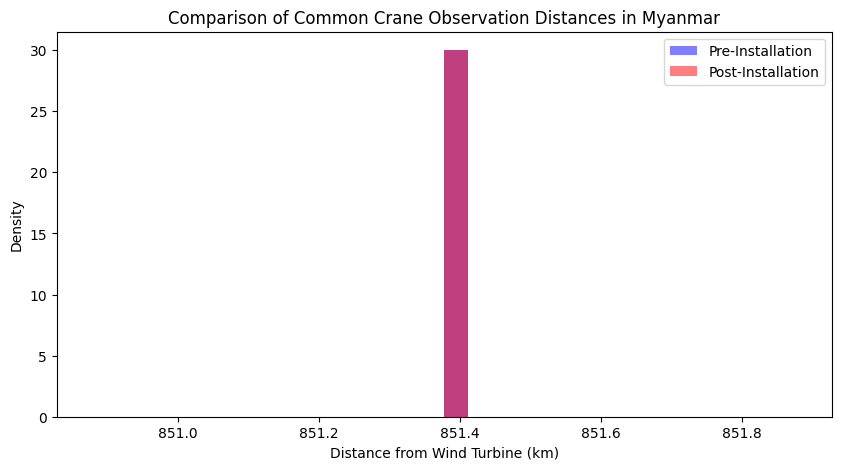

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


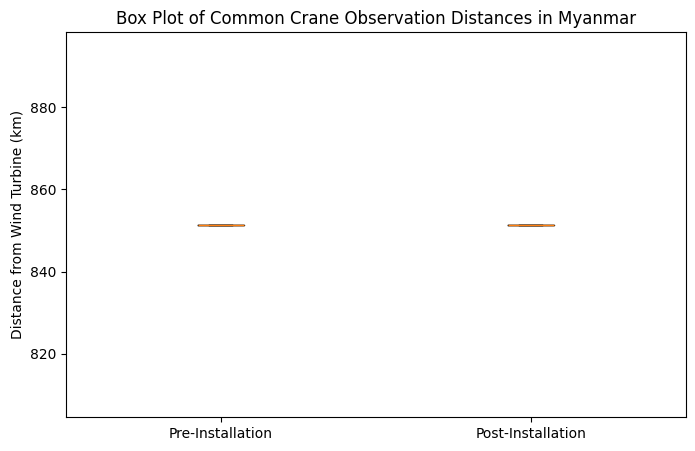

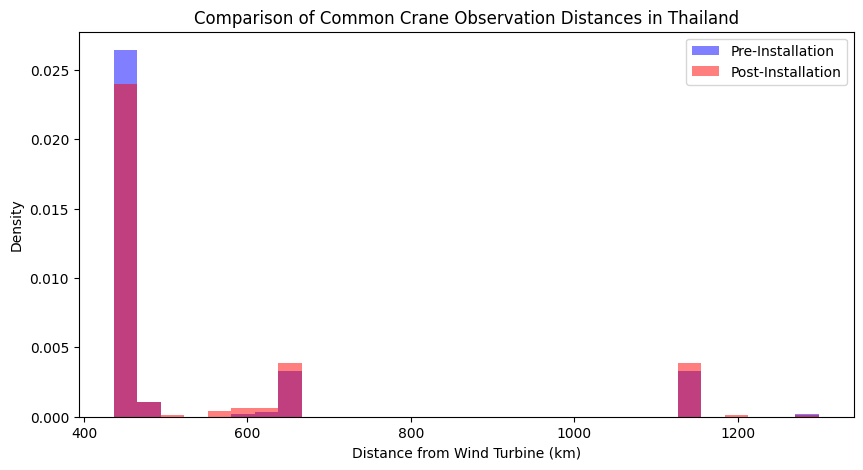

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


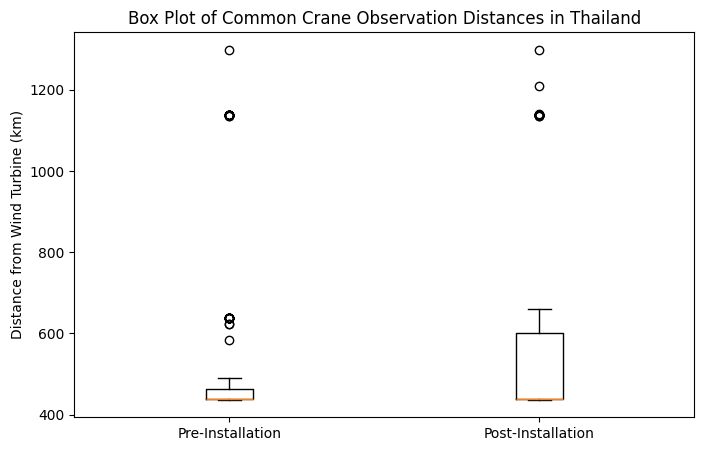

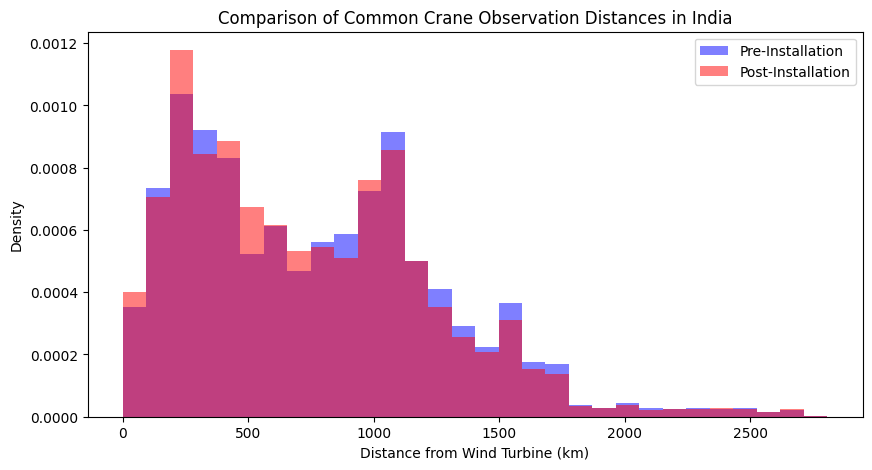

C:\Users\riyas\AppData\Local\Temp\ipykernel_13032\505790756.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])


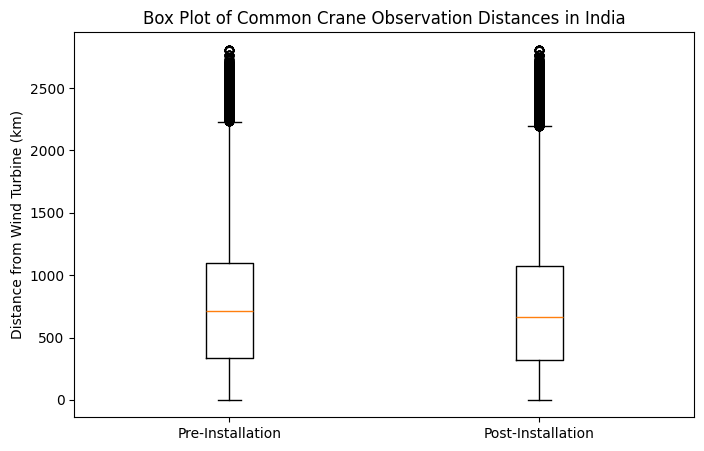

In [ ]:
# Histograms and Box Plots for Distance Comparisons in Each Country
unique_countries = df["WT_COUNTRY"].unique()

for country in unique_countries:
    country_data = df[df["WT_COUNTRY"] == country]
    
    pre_installation_distances = country_data["Distance WT to CC (km)"][country_data["CC_COUNT_PRE_WT"].notnull()]
    post_installation_distances = country_data["Distance WT to CC (km)"][country_data["CC_COUNT_POST_WT"].notnull()]

    # Histogram comparison
    plt.figure(figsize=(10, 5))
    plt.hist(pre_installation_distances, bins=30, alpha=0.5, label="Pre-Installation", density=True, color="blue")
    plt.hist(post_installation_distances, bins=30, alpha=0.5, label="Post-Installation", density=True, color="red")
    plt.xlabel("Distance from Wind Turbine (km)")
    plt.ylabel("Density")
    plt.title(f"Comparison of Common Crane Observation Distances in {country}")
    plt.legend()
    plt.show()

    # Box plot comparison
    plt.figure(figsize=(8, 5))
    plt.boxplot([pre_installation_distances.dropna(), post_installation_distances.dropna()], labels=["Pre-Installation", "Post-Installation"])
    plt.ylabel("Distance from Wind Turbine (km)")
    plt.title(f"Box Plot of Common Crane Observation Distances in {country}")
    plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Create a dictionary to store t-test results for each country
t_test_results = []

# Iterate through each country and perform a t-test
unique_countries = df["WT_COUNTRY"].unique()

for country in unique_countries:
    country_data = df[df["WT_COUNTRY"] == country]
    
    pre_installation_distances = country_data["Distance WT to CC (km)"][country_data["CC_COUNT_PRE_WT"].notnull()]
    post_installation_distances = country_data["Distance WT to CC (km)"][country_data["CC_COUNT_POST_WT"].notnull()]
    
    # Perform t-test if both pre- and post-installation data exist for the country
    if not pre_installation_distances.empty and not post_installation_distances.empty:
        t_stat, p_value = ttest_ind(pre_installation_distances.dropna(), post_installation_distances.dropna(), equal_var=False)
        t_test_results.append({"Country": country, "t-statistic": t_stat, "p-value": p_value})

# Convert results into a DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results)

t_test_results_df


c:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Country,t-statistic,p-value
0,Egypt,-0.159551,8.733224e-01
1,Morocco,0.477395,6.334264e-01
2,Tunisia,0.000000,1.000000e+00
3,Ethiopia,0.187517,8.513381e-01
4,Netherlands,-0.338673,7.369935e-01
5,France,0.085639,9.317579e-01
6,Canada,0.687557,4.917989e-01
7,United States,-0.369094,7.121018e-01
8,Kazakhstan,-0.127551,8.985420e-01
9,Uzbekistan,0.158346,8.925928e-01


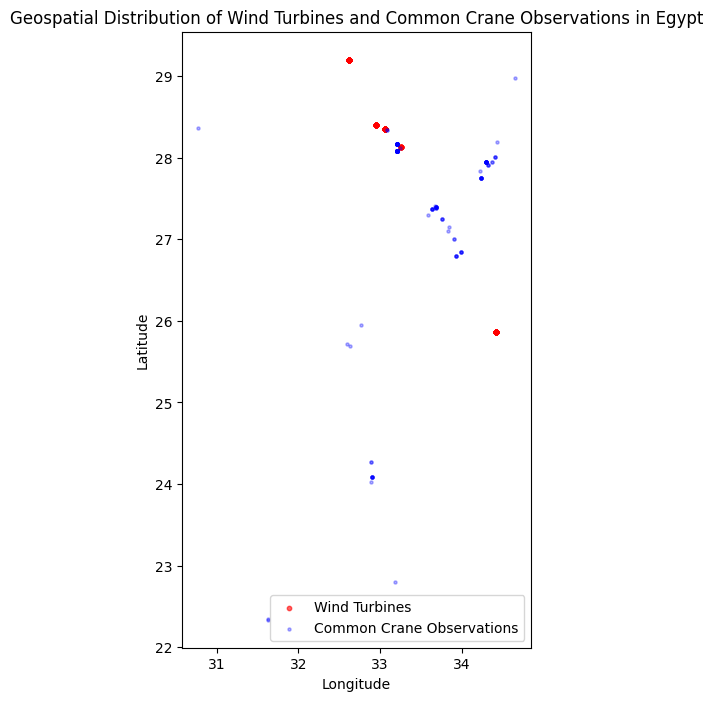

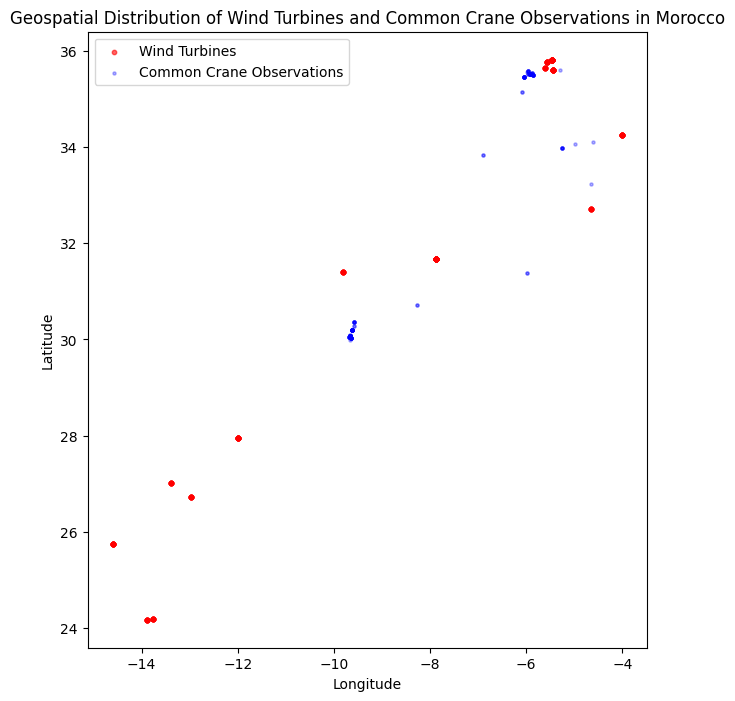

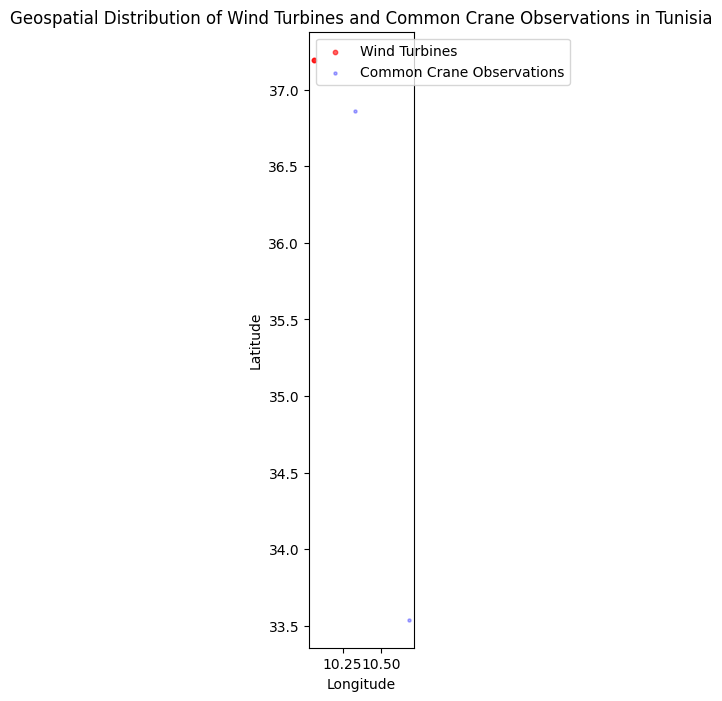

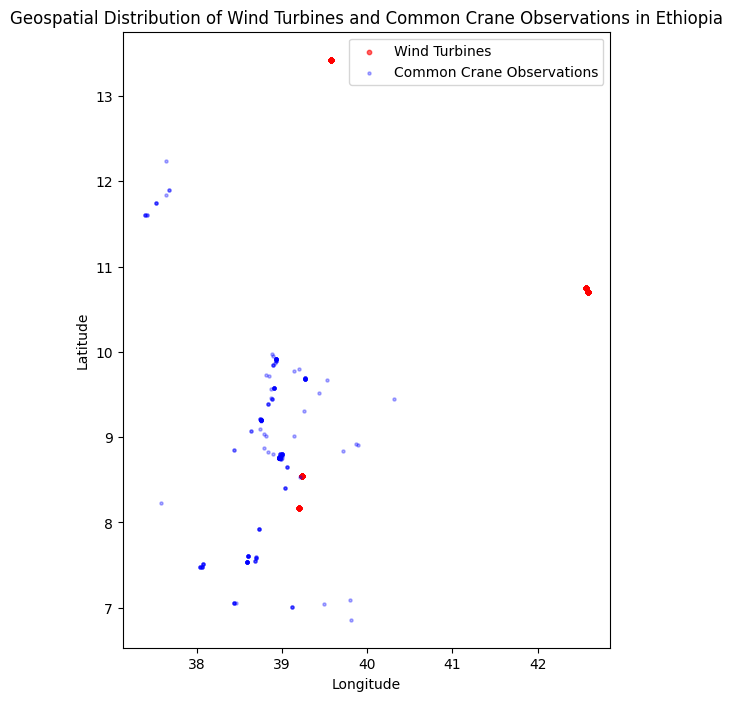

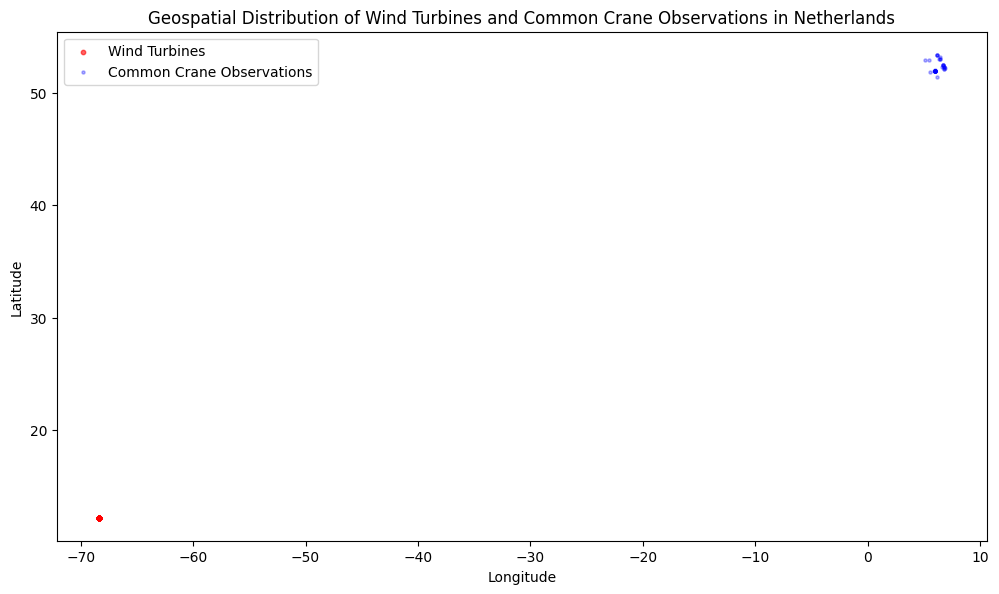

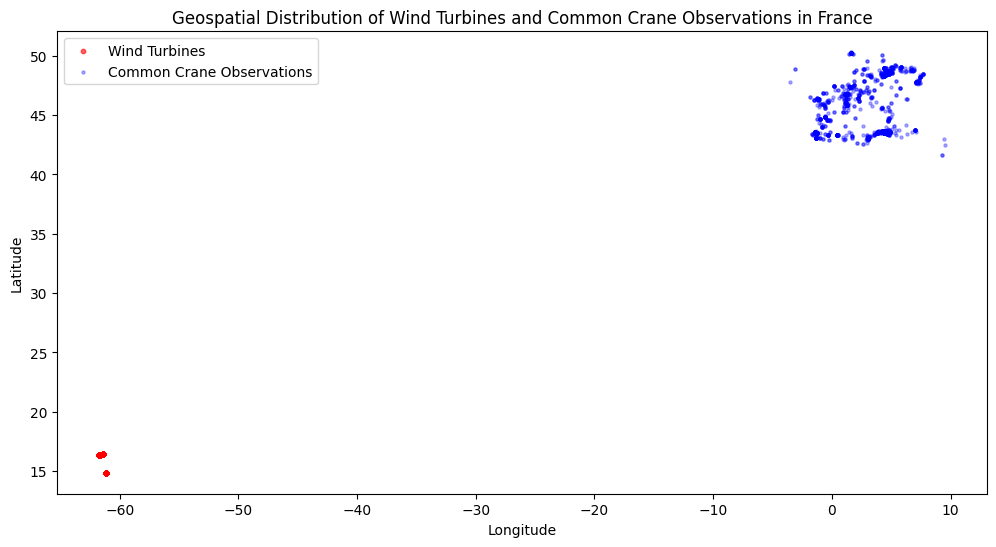

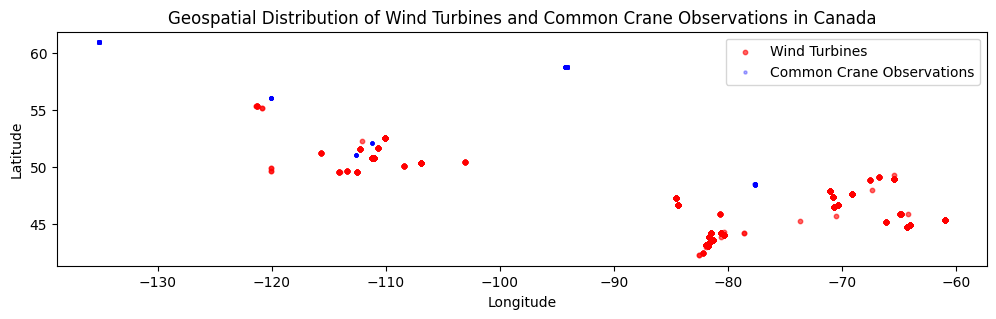

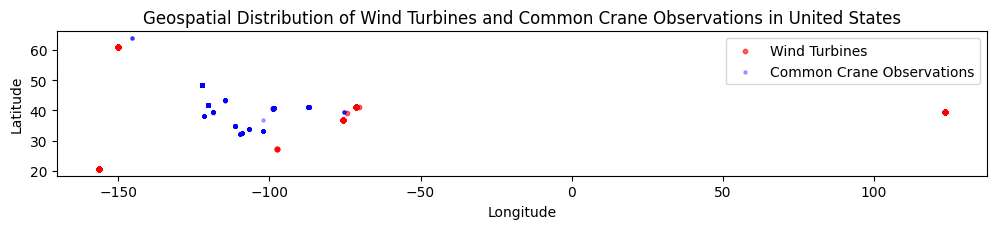

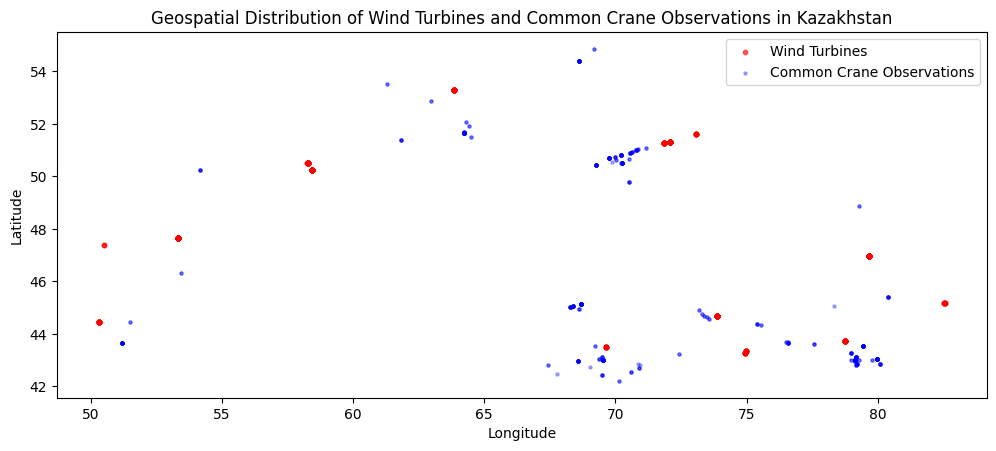

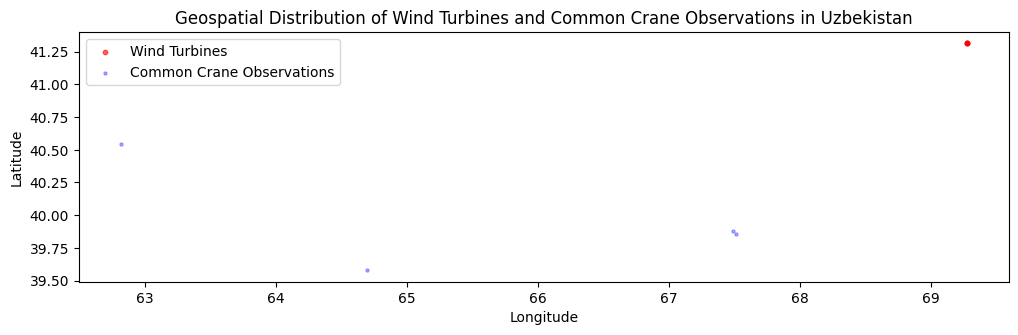

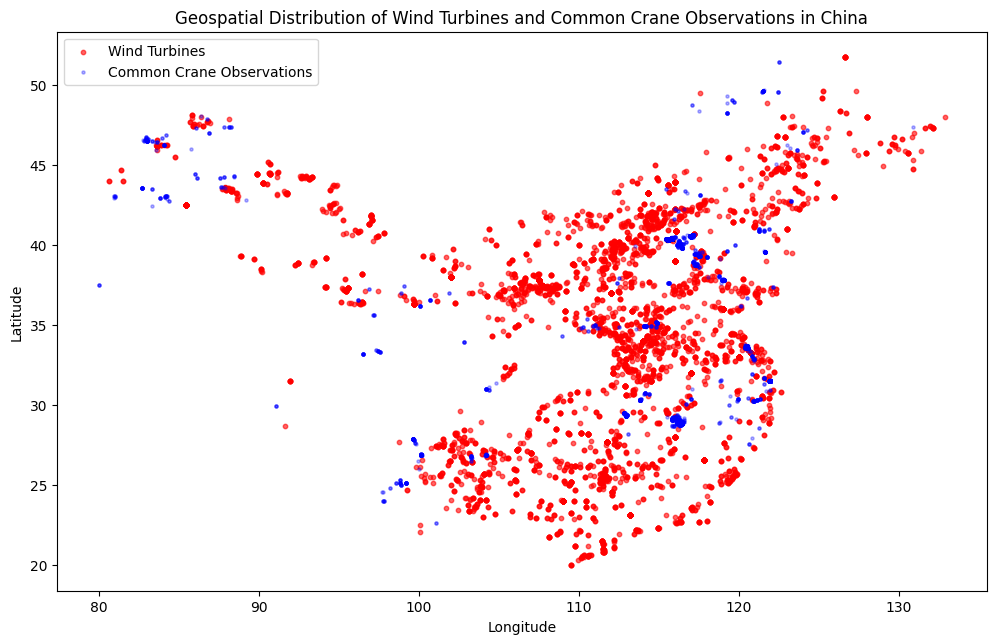

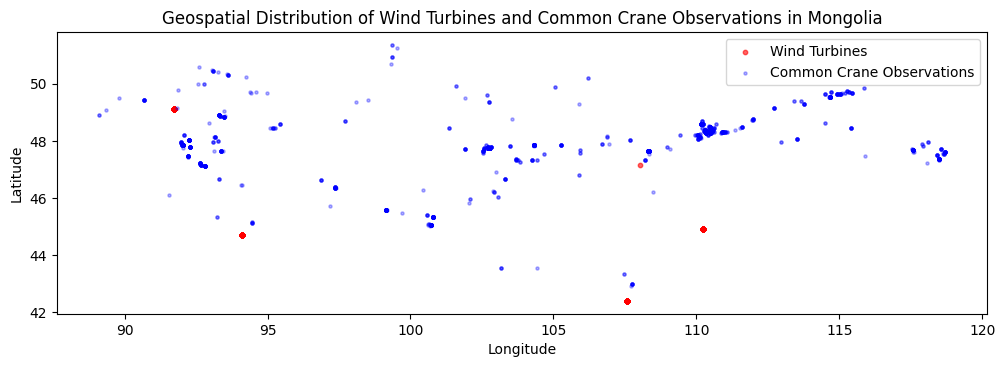

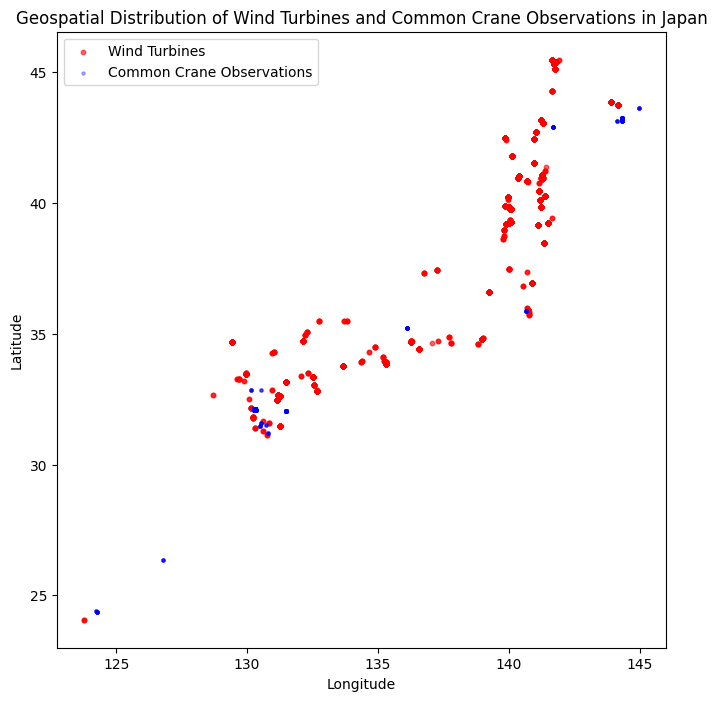

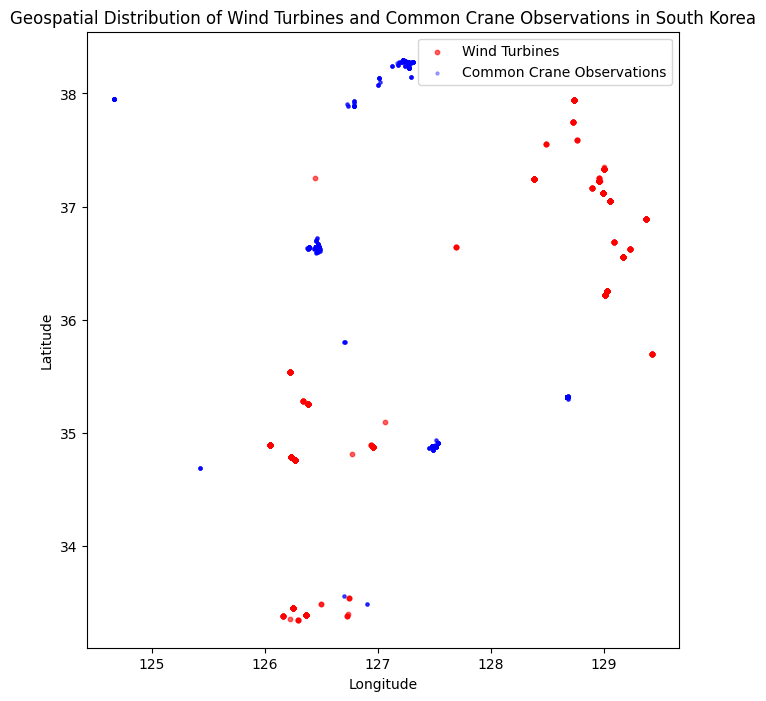

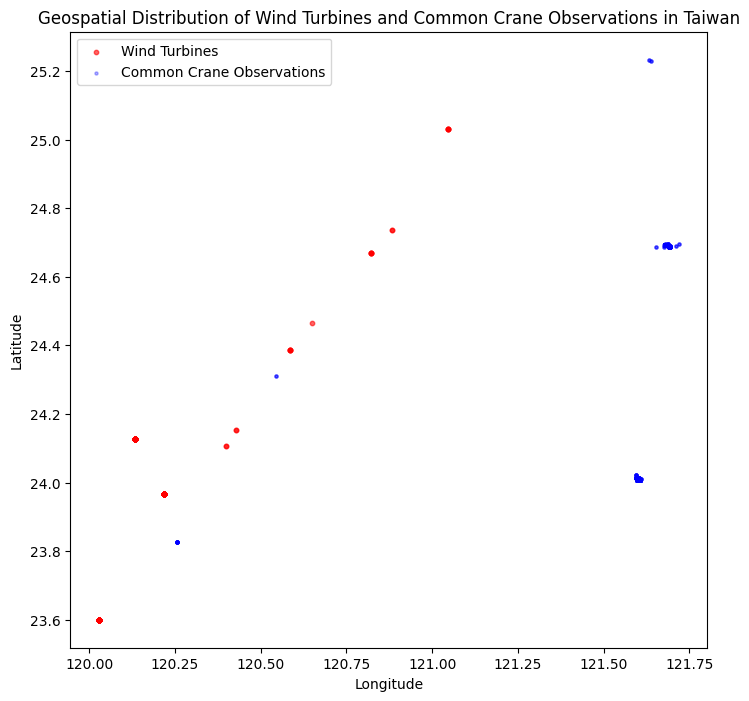

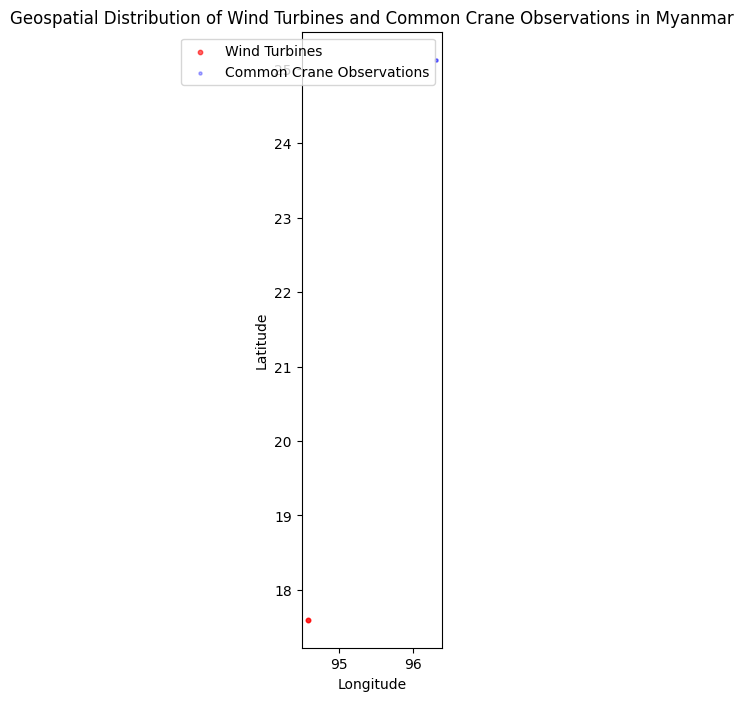

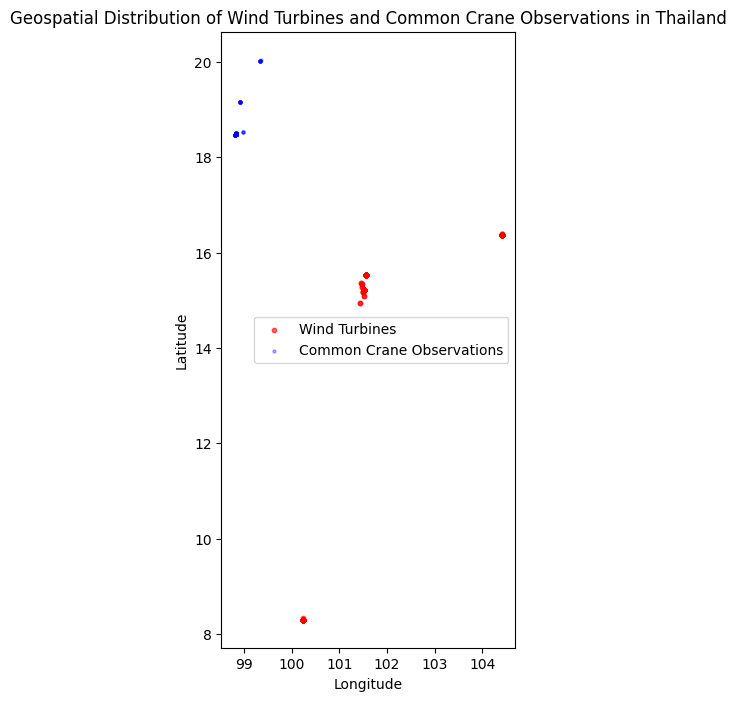

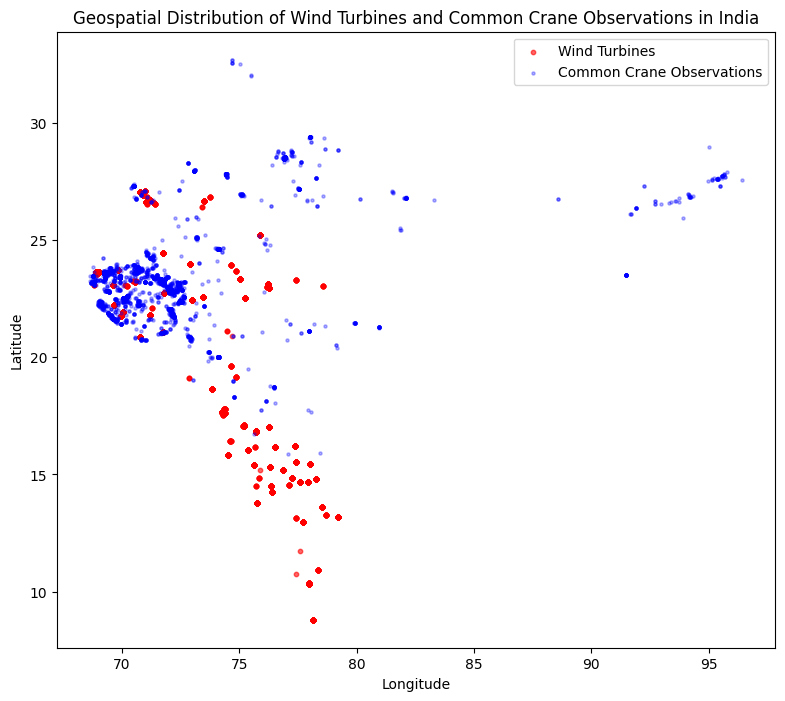

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geodatasets import get_path

# Sample data to reduce memory load for visualization
sample_size = 5000  # Adjust if necessary

# Iterate through each country and plot geospatial distributions
unique_countries = df["WT_COUNTRY"].unique()

for country in unique_countries:
    country_data = df[df["WT_COUNTRY"] == country].sample(n=min(sample_size, len(df[df["WT_COUNTRY"] == country])), random_state=42)

    # Create GeoDataFrames for wind turbines and crane observations
    gdf_turbines = gpd.GeoDataFrame(country_data, geometry=gpd.points_from_xy(country_data['WT_LONGITUDE'], country_data['WT_LATITUDE']))
    gdf_cranes = gpd.GeoDataFrame(country_data, geometry=gpd.points_from_xy(country_data['CC_LONGITUDE'], country_data['CC_LATITUDE']))

    # Plot the locations of wind turbines and crane observations
    fig, ax = plt.subplots(figsize=(12, 8))
    gdf_turbines.plot(ax=ax, markersize=10, color='red', alpha=0.6, label="Wind Turbines")
    gdf_cranes.plot(ax=ax, markersize=5, color='blue', alpha=0.3, label="Common Crane Observations")

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Geospatial Distribution of Wind Turbines and Common Crane Observations in {country}")
    plt.legend()
    plt.show()


In [ ]:
import geopandas as gpd 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geodatasets import get_path

# Load a base world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth.land'))

# Sample data to reduce memory load for visualization
sample_size = 5000  # Adjust if necessary

# Iterate through each country and plot geospatial distributions
unique_countries = df["WT_COUNTRY"].unique()

for country in unique_countries:
    # Filter country boundary from world map
    country_map = world[world["name"] == country]

    # Subset and sample data for the country
    country_data = df[df["WT_COUNTRY"] == country].sample(n=min(sample_size, len(df[df["WT_COUNTRY"] == country])), random_state=42)

    # Create GeoDataFrames for wind turbines and crane observations
    gdf_turbines = gpd.GeoDataFrame(country_data, geometry=gpd.points_from_xy(country_data['WT_LONGITUDE'], country_data['WT_LATITUDE']))
    gdf_cranes = gpd.GeoDataFrame(country_data, geometry=gpd.points_from_xy(country_data['CC_LONGITUDE'], country_data['CC_LATITUDE']))

    # Plot the country's map
    fig, ax = plt.subplots(figsize=(12, 8))
    country_map.plot(ax=ax, color="lightgrey", edgecolor="black")  # Plot country boundary
    gdf_turbines.plot(ax=ax, markersize=10, color='red', alpha=0.6, label="Wind Turbines")
    gdf_cranes.plot(ax=ax, markersize=5, color='blue', alpha=0.3, label="Common Crane Observations")

    # Set axis limits to zoom into the country
    ax.set_xlim(country_map.total_bounds[0] - 1, country_map.total_bounds[2] + 1)
    ax.set_ylim(country_map.total_bounds[1] - 1, country_map.total_bounds[3] + 1)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Geospatial Distribution of Wind Turbines and Common Crane Observations in {country}")
    plt.legend()
    plt.show()
